In [13]:
%load_ext autoreload
%autoreload 2
import torch as t
import matplotlib.pyplot as plt
from gninvert.functions import sort_with, gn_time_series
from gninvert.graph_compare import model_compare
from gninvert.rule_discovery import *
from gninvert.hyperparamsearch import get_hyperparam_dtree, view_hp_results_graph, hp_stats
from gninvert.dtree import decision_tree_paths
from gninvert.gns import *
import pandas as pd
import pysr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
sr_on_gn_diff2 = t.load('runs/SR_diff2/sr')
sr_on_gn_diff2

{'message_sr_result': [complexity                                    5
  loss                                        0.0
  score                                       inf
  equation             ((xs1 - xt1) * 0.10000013)
  sympy_format    0.10000013*xs1 - 0.10000013*xt1
  Name: 2, dtype: object,
  complexity                         5
  loss                             0.0
  score                            inf
  equation        ((xt2 - xs2) * -0.1)
  sympy_format       0.1*xs2 - 0.1*xt2
  Name: 2, dtype: object],
 'update_sr_result': [complexity               3
  loss                   0.0
  score                  inf
  equation        (xt1 + a1)
  sympy_format      a1 + xt1
  Name: 1, dtype: object,
  complexity               3
  loss                   0.0
  score                  inf
  equation        (xt2 + a2)
  sympy_format      a2 + xt2
  Name: 1, dtype: object],
 'message_variable_order': [[xt1, xt2, xs1, xs2], [xt1, xt2, xs1, xs2]],
 'update_variable_order': [[xt1, xt2, a1, a2]

In [5]:
sr_on_gn_diff3 = t.load('runs/SR_diff3/sr')
sr_on_gn_diff3

{'message_sr_result': [complexity                         5
  loss                             0.0
  score                            inf
  equation        ((xt1 - xs1) * -0.1)
  sympy_format       0.1*xs1 - 0.1*xt1
  Name: 2, dtype: object,
  complexity                                    5
  loss                                        0.0
  score                                       inf
  equation             ((xs2 - xt2) * 0.09999987)
  sympy_format    0.09999987*xs2 - 0.09999987*xt2
  Name: 2, dtype: object,
  complexity                                      5
  loss                                          0.0
  score                                         inf
  equation             ((xt3 - xs3) * -0.099999994)
  sympy_format    0.099999994*xs3 - 0.099999994*xt3
  Name: 2, dtype: object],
 'update_sr_result': [complexity               3
  loss                   0.0
  score                  inf
  equation        (a1 + xt1)
  sympy_format      a1 + xt1
  Name: 1, dtype: object,
  co

In [6]:
sr_on_gn_actinh = t.load('runs/SR_act_inh_simple/sr')
sr_on_gn_actinh
# NOTE! Below, the a and xt variables are swapped in the update equations
# (this bug, purely about naming, existed when the runs were made but has since been fixed)

{'message_sr_result': [complexity                         5
  loss                             0.0
  score                            inf
  equation        ((xt2 - xs2) * -0.1)
  sympy_format       0.1*xs2 - 0.1*xt2
  Name: 2, dtype: object,
  complexity                                    5
  loss                                        0.0
  score                                       inf
  equation             ((xs3 - xt3) * 0.04999993)
  sympy_format    0.04999993*xs3 - 0.04999993*xt3
  Name: 2, dtype: object],
 'update_sr_result': [complexity                                      9
  loss                                          0.0
  score                                         inf
  equation        (a1 + (((a3 - a2) * -0.05) / a1))
  sympy_format          a1 + (0.05*a2 - 0.05*a3)/a1
  Name: 4, dtype: object,
  complexity               3
  loss                   0.0
  score                  inf
  equation        (xt1 + a2)
  sympy_format      a2 + xt1
  Name: 1, dtype: object,
  co

In [7]:
sr_on_gn_actinh_full = t.load('runs/SR_act_inh_full/sr')
sr_on_gn_actinh_full
# NOTE! Below, the a and xt variables are swapped in the update equations
# (this bug, purely about naming, existed when the runs were made but has since been fixed)

{'message_sr_result': [complexity                                    5
  loss                                        0.0
  score                                       inf
  equation             ((xs2 - xt2) * 0.10000013)
  sympy_format    0.10000013*xs2 - 0.10000013*xt2
  Name: 2, dtype: object,
  complexity                         5
  loss                             0.0
  score                            inf
  equation        ((xs3 - xt3) * 0.01)
  sympy_format     0.01*xs3 - 0.01*xt3
  Name: 2, dtype: object],
 'update_sr_result': [complexity                       3
  loss                      0.000512
  score                     0.366335
  equation        (a1 + 0.023522463)
  sympy_format      a1 + 0.023522463
  Name: 1, dtype: object,
  complexity                                                     11
  loss                                                     0.006075
  score                                                    0.884396
  equation        ((a2 * ((a2 * 0.18499938) / 

In [8]:
sr_diff1 = t.load('runs/PAPER_diff1/sr')
sr_diff1

{'message_sr_result': complexity                                   5
 loss                                  0.059278
 score                                 0.767715
 equation        ((xs * -2.6309328) + 1.650251)
 sympy_format           1.650251 - 2.6309328*xs
 Name: 2, dtype: object,
 'update_sr_result': complexity                                     5
 loss                                    0.000389
 score                                   1.543834
 equation        ((a * 0.67616796) - -0.18268661)
 sympy_format           0.67616796*a + 0.18268661
 Name: 2, dtype: object,
 'message_variable_order': [xt, xs],
 'update_variable_order': [xt, a],
 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle True>}

In [9]:
sr_diff2 = t.load('runs/PAPER_diff2/sr')
sr_diff2

{'message_sr_result': [complexity                     1
  loss                         NaN
  score                        0.0
  equation               14.854478
  sympy_format    14.8544780000000
  Name: 0, dtype: object,
  complexity                        1
  loss                            0.0
  score                           0.0
  equation                  -0.051855
  sympy_format    -0.0518554500000000
  Name: 0, dtype: object],
 'update_sr_result': [complexity                                       7
  loss                                      0.190139
  score                                     0.461045
  equation         (((xt1 - a1) * -2.4951134) - xt2)
  sympy_format    2.4951134*a1 - 2.4951134*xt1 - xt2
  Name: 3, dtype: object,
  complexity                                                    11
  loss                                                    0.047891
  score                                                   0.286759
  equation        ((a2 + ((a1 + (xt1 * -1.7825565

In [10]:
sr_actinhs = t.load('runs/PAPER_act_inh_simple/sr')
sr_actinhs

{'message_sr_result': [complexity                       1
  loss                           0.0
  score                          0.0
  equation                 -0.137347
  sympy_format    -0.137347010000000
  Name: 0, dtype: object,
  complexity                        1
  loss                            0.0
  score                           0.0
  equation                  -0.018358
  sympy_format    -0.0183582120000000
  Name: 0, dtype: object],
 'update_sr_result': [complexity                       3
  loss                      0.861248
  score                     0.426507
  equation        (xt2 * -3.4968727)
  sympy_format        -3.4968727*xt2
  Name: 1, dtype: object,
  complexity               3
  loss              0.094009
  score             0.629874
  equation        (a2 - xt2)
  sympy_format      a2 - xt2
  Name: 1, dtype: object,
  complexity                              5
  loss                             0.324998
  score                            0.641364
  equation       

# HP settings: general

In [11]:
t.load('runs/GENERAL_diff1/sr')

{'message_sr_result': complexity                                 5
 loss                                0.000559
 score                               1.849802
 equation             ((xt - xs) * 0.6246547)
 sympy_format    -0.6246547*xs + 0.6246547*xt
 Name: 2, dtype: object,
 'update_sr_result': complexity                             5
 loss                            0.000046
 score                           1.907153
 equation        ((xt * -0.14862719) + a)
 sympy_format           a - 0.14862719*xt
 Name: 2, dtype: object,
 'message_variable_order': [xt, xs],
 'update_variable_order': [xt, a],
 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle False>}

In [16]:
t.load('runs/GENERAL_diff2/sr')['update_sr_result'][0]['equation']

'(((a1 + (xt1 * 0.1267788)) - -0.043961965) * 0.8946484)'

In [13]:
t.load('runs/GENERAL_act_inh_simple/sr')

{'message_sr_result': [complexity                                      5
  loss                                     0.002622
  score                                     0.91558
  equation        ((xs3 * -0.5886848) + 0.28470114)
  sympy_format           0.28470114 - 0.5886848*xs3
  Name: 2, dtype: object,
  complexity                       3
  loss                      0.006273
  score                     1.224054
  equation        (xs2 + -0.5105007)
  sympy_format       xs2 - 0.5105007
  Name: 1, dtype: object],
 'update_sr_result': [complexity                                                     11
  loss                                                     0.002345
  score                                                    0.811291
  equation        (a1 - ((xt1 - a2) / ((a1 / 0.071314014) + 0.47...
  sympy_format    a1 - (-a2 + xt1)/(14.0224893244685*a1 + 0.4755...
  Name: 5, dtype: object,
  complexity                                                      9
  loss                     

## HP settings: fine-tuned

In [10]:
view_sr_results('runs/PRECISE1_diff1')

message_sr_result | ((xt - xs) * -0.24516167) | loss 0.0002417058
update_sr_result | (a + ((0.5053277 - (a * 0.37709332)) * xt)) | loss 0.0008162059


(RecoveredGN(), SingleDiffusionGN())

In [11]:
view_sr_results('runs/PRECISE1_diff2')

message_sr_result | (((xs2 - xt2) - ((xt1 - xs1) * -0.46747714)) * 0.8181941) | loss 5.1728697e-05
message_sr_result | ((xs1 - (xt1 - ((xs2 - xt2) * 0.56975317))) * 0.73078114) | loss 7.8720186e-05
update_sr_result | (xt1 + (a2 * 0.06045175)) | loss 0.0005919318
update_sr_result | (xt2 + 0.070513874) | loss 0.0010407806


(RecoveredGN(), MultiDiffusionGN())

Data(x=[5, 2], edge_index=[2, 10])
torch.Size([5, 2])
Stats for 20 steps for node features:
Greatest relative difference: 103.01936864852905%
Average relative difference: 100.78579664230347%
Smallest relative difference: 100.00301599502563%
Greatest absolute difference: 0.018281280994415283
Average absolute difference: 0.00481766756856814
Smallest absolute difference: 1.2159347534179688e-05%


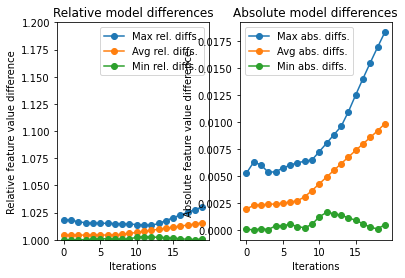

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


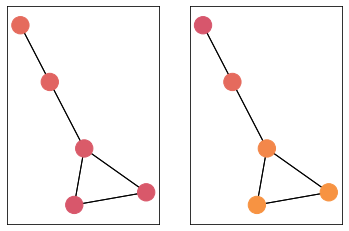

tensor([[0.5587, 0.7450],
        [0.5583, 0.7451],
        [0.5682, 0.7087],
        [0.5989, 0.6172],
        [0.6237, 0.5530]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


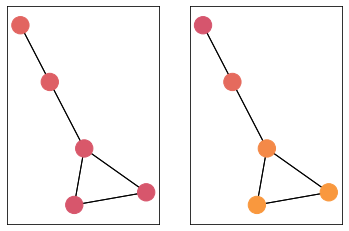

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])


(Data(x=[5, 2], edge_index=[2, 10]), Data(x=[5, 2], edge_index=[2, 10]))

In [14]:
model_compare(t.load('runs/PRECISE1_diff2/model'), MultiDiffusionGN([0.1, 0.1]))

In [24]:
view_sr_results('runs/PRECISE1_diff1')

message_sr_result | ((xt - xs) * -0.24516167) | loss 0.0002417058
update_sr_result | (a + ((0.5053277 - (a * 0.37709332)) * xt)) | loss 0.0008162059


(RecoveredGN(), SingleDiffusionGN())

In [28]:
view_sr_results('runs/PRECISE1_diff2')

message_sr_result | (((xs2 - xt2) - ((xt1 - xs1) * -0.46833253)) * 0.8185371) | loss 5.719161e-05
message_sr_result | (((xs1 - xt1) - ((xt2 - xs2) * 0.5707445)) * 0.729696) | loss 7.521203e-05
update_sr_result | ((a2 * 0.102066934) + ((a1 * -0.055165563) + xt1)) | loss 0.00015401331
update_sr_result | (xt2 + 0.06858979) | loss 0.0010544431


(RecoveredGN(), GNN_full())

In [27]:
rerun_sr('PRECISE1_diff2')

TRAINING
INVERTING


/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Everything saved at runs/PRECISE1_diff2


RecoveredGN()

In [21]:
view_sr_results('runs/SEARCH3_act_inh_simple')

message_sr_result | ((xs2 + -0.50588024) * -0.19902961) | loss 0.00038144074
message_sr_result | ((xs3 - 0.48845932) * -0.13252312) | loss 0.00019964816
update_sr_result | (a1 + (0.0004056322 / (xt1 - a2))) | loss 0.116216876
update_sr_result | (a2 / (xt2 + 1.0717449)) | loss 0.010200492
update_sr_result | (xt1 * 0.6320785) | loss 0.020773804


(RecoveredGN(), ActivatorInhibitorGN())

In [19]:
view_sr_results('runs/EPSSEARCH_act_inh_simple_with_eps')

message_sr_result | (xt2 - xs2) | loss 0.0034564934
message_sr_result | ((xt3 - xs3) * 0.5274449) | loss 0.003646022
update_sr_result | (xt1 + (((xt2 - xt3) * 0.057671707) / (xt1 + 0.14373495))) | loss 6.343419e-05
update_sr_result | ((a1 * -0.081709415) + xt2) | loss 0.00012449919
update_sr_result | ((a2 / -10.2089615) + xt3) | loss 0.00012020768


(RecoveredGN(), ActivatorInhibitorGN())

In [18]:
rerun_sr('linear_diff2')

TRAINING
INVERTING


/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Everything saved at runs/linear_diff2


RecoveredGN()

In [29]:
view_sr_results('runs/PAPER_act_inh_full')

message_sr_result | -0.114095144 | loss 0.0
message_sr_result | 0.11601054 | loss 0.0
update_sr_result | ((((a2 - 1.0700171) * (xt2 / (1.0923223 - xt2))) / (xt1 + a1)) + 0.84002066) | loss 1.5243717
update_sr_result | (-2.0491147 / (-0.027795915 - xt1)) | loss 77.45206
update_sr_result | (((1.8339102 - a1) + xt3) + (xt2 / (-0.071735315 - xt1))) | loss 3.1957078


(RecoveredGN(), FullActInhGN())

# DEBUGGING

In [121]:
lf = pysr.sr.CallableEquation(
    t.load('runs/PRECISE1_diff2/sr')['message_variable_order'],
    t.load('runs/PRECISE1_diff2/sr')['message_sr_result'][0]['sympy_format'])

In [124]:
lf(t.tensor([[0.1, 0.2, 0.3, 0.3]]))

TypeError: _lambdifygenerated() takes 2 positional arguments but 4 were given

In [126]:
lf(t.tensor([[0.1, 0.2]]),
   t.tensor([[0.2, 0.3]]))

TypeError: __call__() takes 2 positional arguments but 3 were given

In [127]:
lf(t.tensor([0., 0.1, 0.2, 0.3]))

TypeError: _lambdifygenerated() takes 2 positional arguments but 4 were given

In [128]:
lf(t.tensor([0.1, 0.2]), t.tensor([0.3, 0.4]))

TypeError: __call__() takes 2 positional arguments but 3 were given

In [133]:
lf(t.tensor([[0.1, 0.2]]))

ValueError: not enough values to unpack (expected 4, got 1)

In [140]:
from gninvert.rule_discovery import rerun_sr

ImportError: cannot import name 'rerun_sr' from 'gninvert.rule_discovery' (/home/lrudl/github/gninvert/gninvert/rule_discovery.py)

In [2]:
rerun_sr('runs/PRECISE1_diff2')

starting invert
TRAINING
INVERTING


/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
┌ Warning: Replacing module `Parsers`
└ @ Base loading.jl:1036
┌ Warning: Replacing module `MacroTools`
└ @ Base loading.jl:1036
/home/lrudl/.pyenv/versions/3.9.10/lib/python3.9/site-packages/pysr/sr.py:567: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Everything saved at runs/runs/PRECISE1_diff2


In [125]:
lf

PySRFunction(X=>-0.381551048515743*xs1 + 0.81755525*xs2 + 0.381551048515743*xt1 - 0.81755525*xt2)

In [67]:
len(t.load('runs/PRECISE1_diff2/sr')['message_sr_result'])

2

In [9]:
srgn, gn = view_sr_results('runs/PRECISE1_diff2')

message_sr_result | (((xs2 - xt2) - ((xt1 - xs1) * -0.46747714)) * 0.8181941) | loss 5.1728697e-05
message_sr_result | ((xs1 - (xt1 - ((xs2 - xt2) * 0.56975317))) * 0.73078114) | loss 7.8720186e-05
update_sr_result | (xt1 + (a2 * 0.06045175)) | loss 0.0005919318
update_sr_result | (xt2 + 0.070513874) | loss 0.0010407806


In [93]:
gn_time_series(gn, 10, sample_graph_from_gn(gn))

[Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10]),
 Data(x=[5, 2], edge_index=[2, 10])]

In [97]:
sample_graph_from_gn(gn).x

tensor([[0.5315, 0.1587],
        [0.6542, 0.3278],
        [0.6532, 0.3958],
        [0.9147, 0.2036],
        [0.2018, 0.2018]])

In [4]:
sample_graph_from_gn(srgn).x

tensor([[0.1281, 0.2732],
        [0.5924, 0.1986],
        [0.2761, 0.1855],
        [0.8159, 0.2386],
        [0.7756, 0.0286]])

In [5]:
srgn.message(t.tensor([[0.1, 0.2]]),
             t.tensor([[0.2, 0.3]]))

TypeError: _lambdifygenerated() takes 2 positional arguments but 4 were given

In [117]:
srgn.message_fn(t.tensor([[0.1, 0.1], [0.1, 0.1], [0.2, 0.2], [0.3, 0.3]]))

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [113]:
srgn.message_fn

<function gninvert.gns.component_fns_to_vector_fn.<locals>.fn(in_tensor)>

In [101]:
gn.message(t.tensor([[0.1, 0.2]]),
           t.tensor([[0.2, 0.3]]))

tensor([[0.0100, 0.0100]])

In [94]:
gn_time_series(srgn, 10, sample_graph_from_gn(srgn))

TypeError: _lambdifygenerated() takes 2 positional arguments but 4 were given

In [75]:
gn.message_features

1

In [77]:
srgn.message_features

1

In [22]:
t.load('runs/three_vardiff3/sr')

{'message_sr_result': [complexity                                                      9
  loss                                                     0.000568
  score                                                    1.825053
  equation               ((xt2 + (xt1 - (xs1 + xs2))) * 0.63471156)
  sympy_format    -0.63471156*xs1 - 0.63471156*xs2 + 0.63471156*...
  Name: 4, dtype: object,
  complexity                                                     15
  loss                                                     0.000234
  score                                                    0.828622
  equation        ((xs2 - ((((xs1 - (xt1 - xt3)) - xs3) / -1.759...
  sympy_format    0.144221327244743*xs1 + 0.25371775*xs2 - 0.144...
  Name: 7, dtype: object,
  complexity                                                     11
  loss                                                     0.000079
  score                                                    2.151794
  equation        (((xt1 - ((xt2 - xs2) * 0

In [18]:
t.load('runs/SEARCH3_act_inh_simple/sr')

{'message_sr_result': [complexity                                        5
  loss                                       0.000381
  score                                      1.033665
  equation        ((xs2 + -0.50588024) * -0.19902961)
  sympy_format     0.100685146873906 - 0.19902961*xs2
  Name: 2, dtype: object,
  complexity                                        5
  loss                                         0.0002
  score                                      0.887728
  equation         ((xs3 - 0.48845932) * -0.13252312)
  sympy_format    0.0647321530794784 - 0.13252312*xs3
  Name: 2, dtype: object],
 'update_sr_result': [complexity                                       7
  loss                                      0.116217
  score                                     0.053427
  equation        (a1 + (0.0004056322 / (xt1 - a2)))
  sympy_format         a1 + 0.0004056322/(-a2 + xt1)
  Name: 3, dtype: object,
  complexity                             5
  loss                          